In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocesamiento de datos.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Librerias de Redes Neuronales
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

#Métricas de Validación

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.metrics import confusion_matrix

2024-05-13 16:42:37.493236: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 16:42:37.689831: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 16:42:38.376058: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 16:42:39.515529: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Lectura de sample_submission

In [2]:
df = pd.read_csv("sample_submission.csv")
df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [4]:
df.isnull().sum()

Id           0
SalePrice    0
dtype: int64

In [5]:
df.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,179183.918243
std,421.321334,16518.303051
min,1461.000000,135751.318893
25%,1825.500000,168703.011202
50%,2190.000000,179208.665698
75%,2554.500000,186789.409363
max,2919.000000,281643.976117


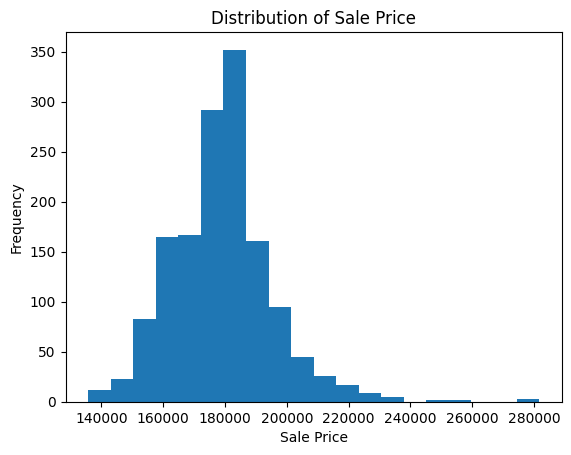

In [6]:
plt.hist(df['SalePrice'], bins=20)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')
plt.show()


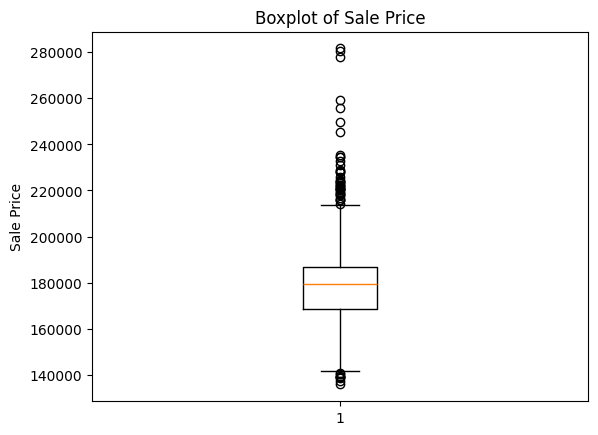

In [7]:
plt.boxplot(df['SalePrice'])
plt.ylabel('Sale Price')
plt.title('Boxplot of Sale Price')
plt.show()

# Lectura de train.csv

In [8]:
df_train = pd.read_csv("train.csv")
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
# Calcula la moda de cada columna
moda_por_columna = df_train.mode().iloc[0]

# Rellena los valores NaN con la moda de cada columna
df_train = df_train.fillna(moda_por_columna)
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125


In [11]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,68.267123,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.356355,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


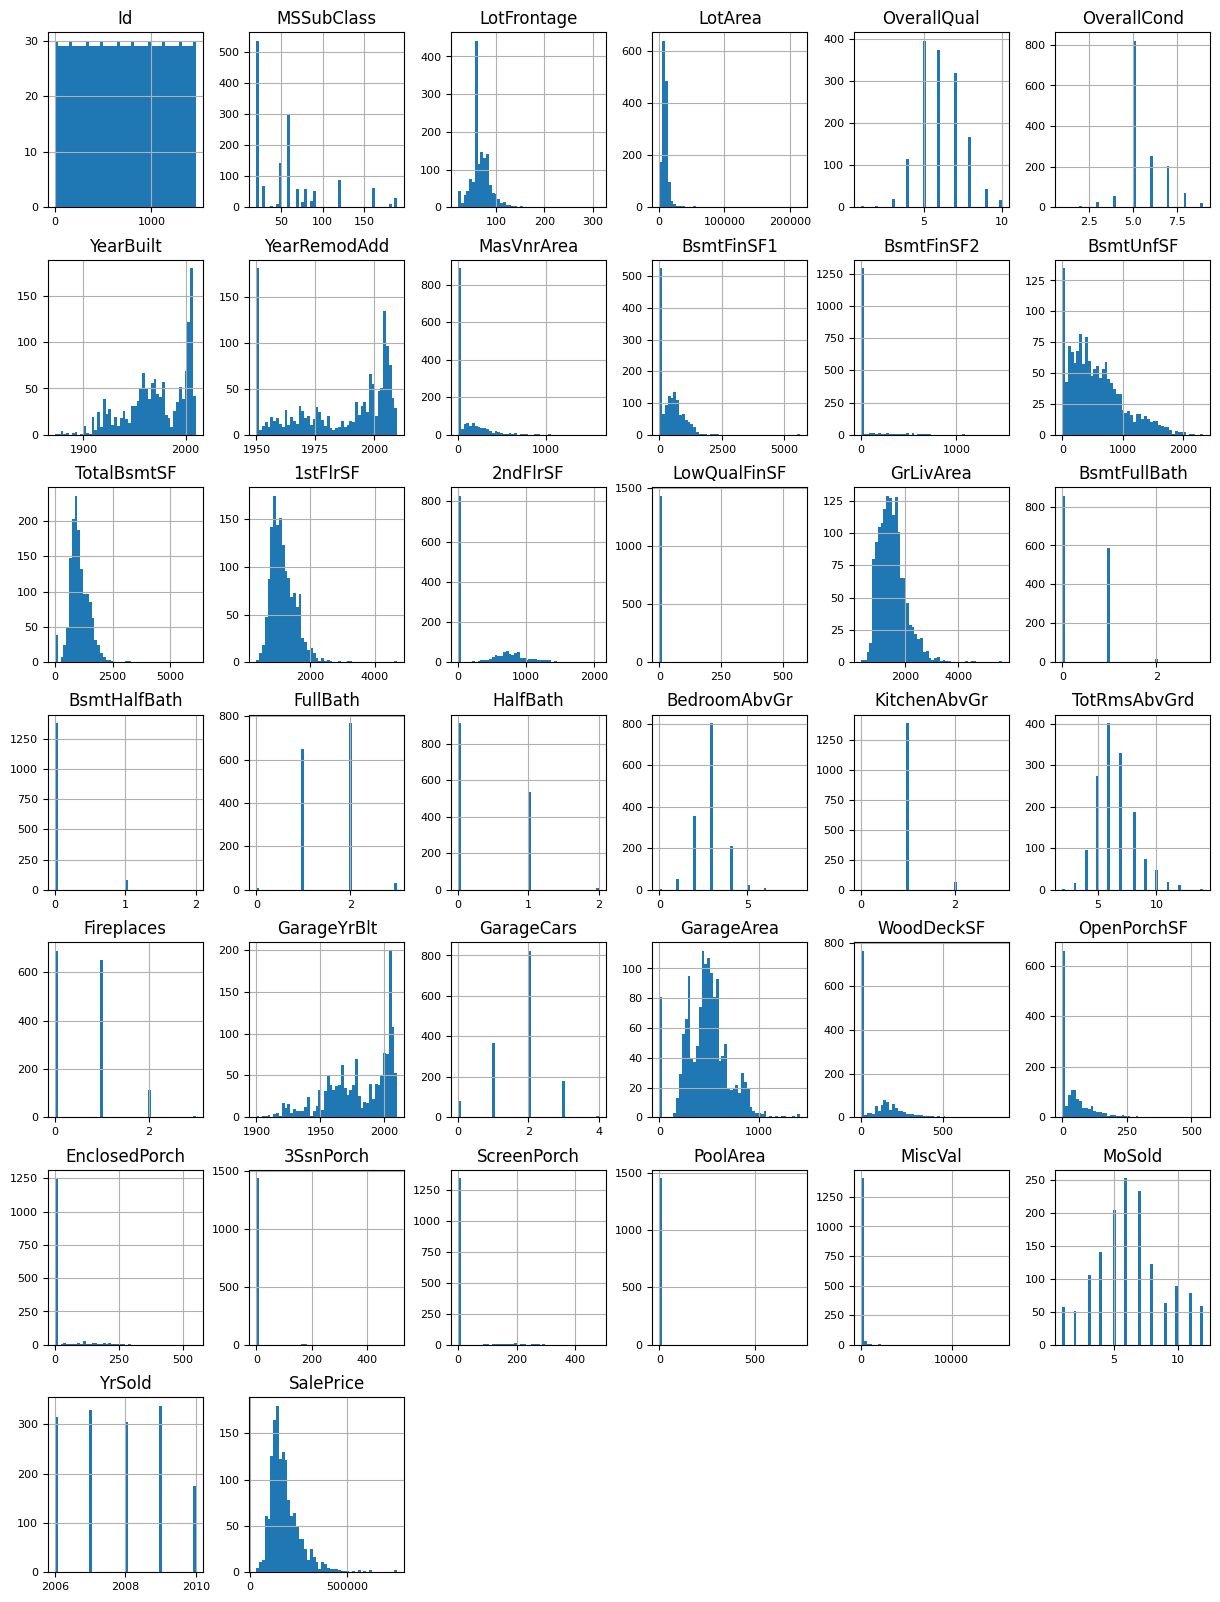

In [14]:
df_train.hist(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [15]:
# Separar variables categóricas y numéricas
df_train_variables_numericas = df_train.select_dtypes(include=['int64', 'float64'])
df_train_variables_categoricas = df_train.select_dtypes(include=['object'])
# Visualizar las columnas seleccionadas
print("Variables numéricas:")
print(df_train_variables_numericas.columns)
print("\nVariables categóricas:")
print(df_train_variables_categoricas.columns)

Variables numéricas:
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Variables categóricas:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtF

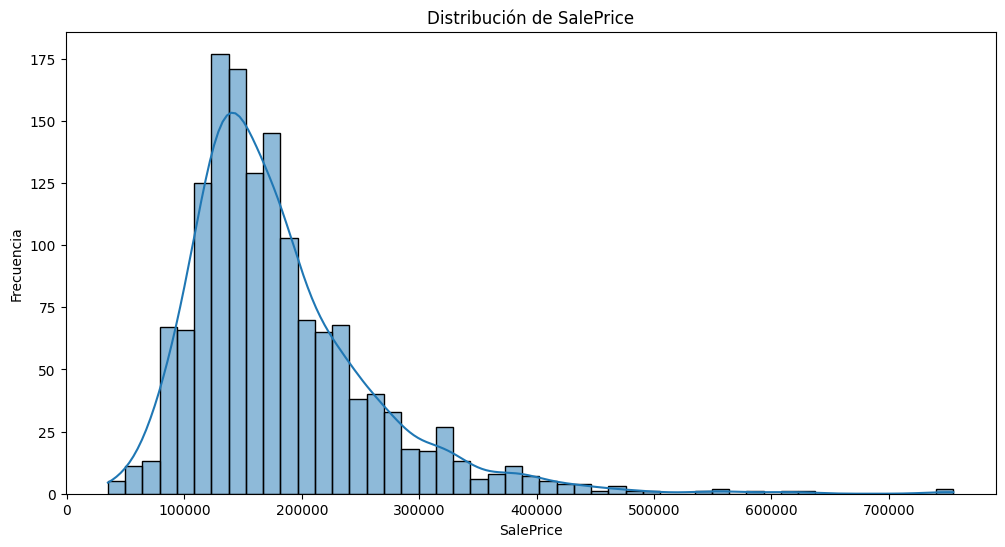

In [16]:

plt.figure(figsize=(12, 6))
sns.histplot(df_train_variables_numericas['SalePrice'], kde=True)
plt.title('Distribución de SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.show()


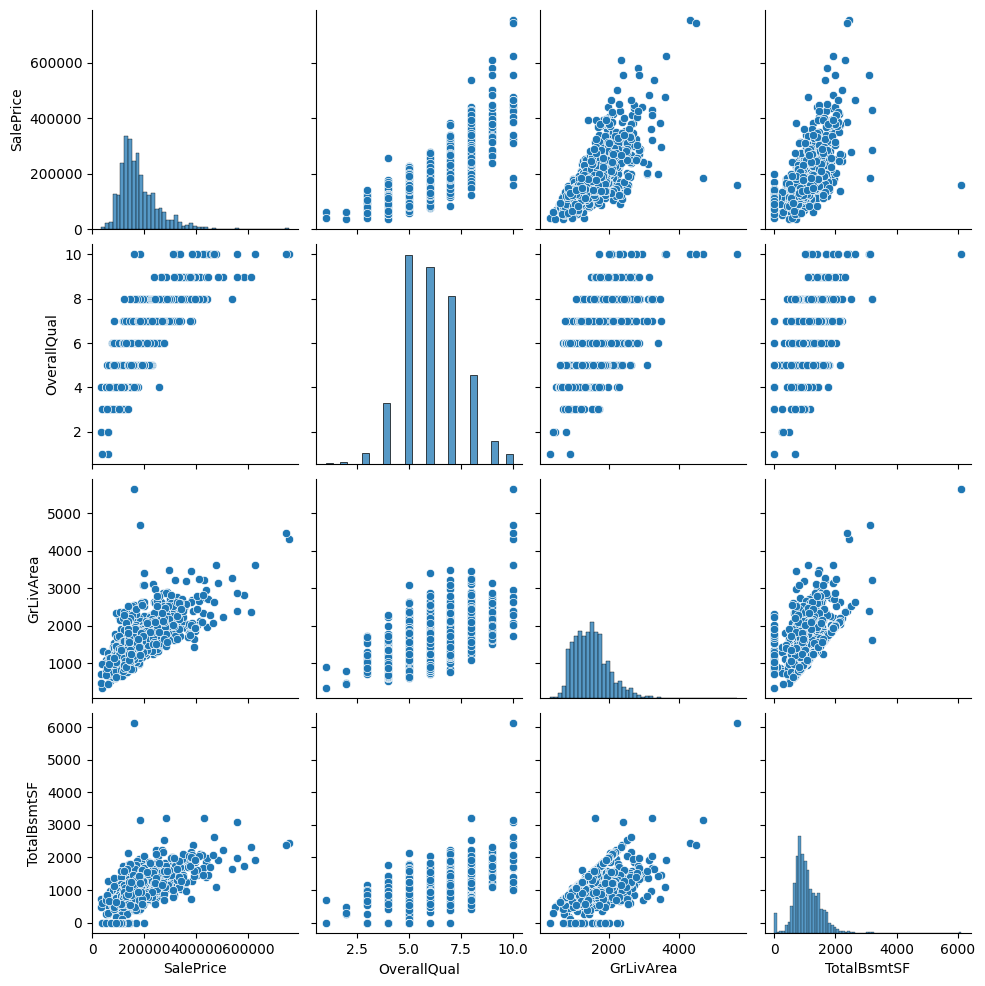

In [17]:
sns.pairplot(df_train[['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF']])

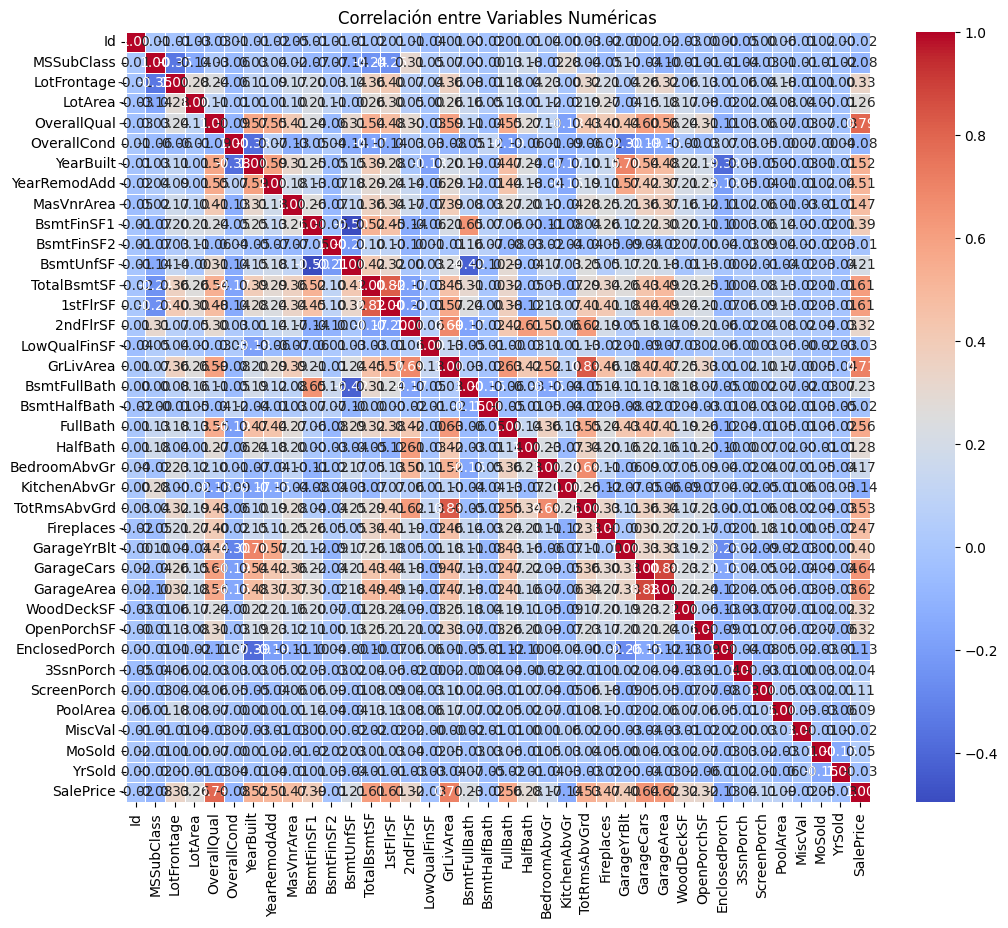

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_train_variables_numericas.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlación entre Variables Numéricas')
plt.show()


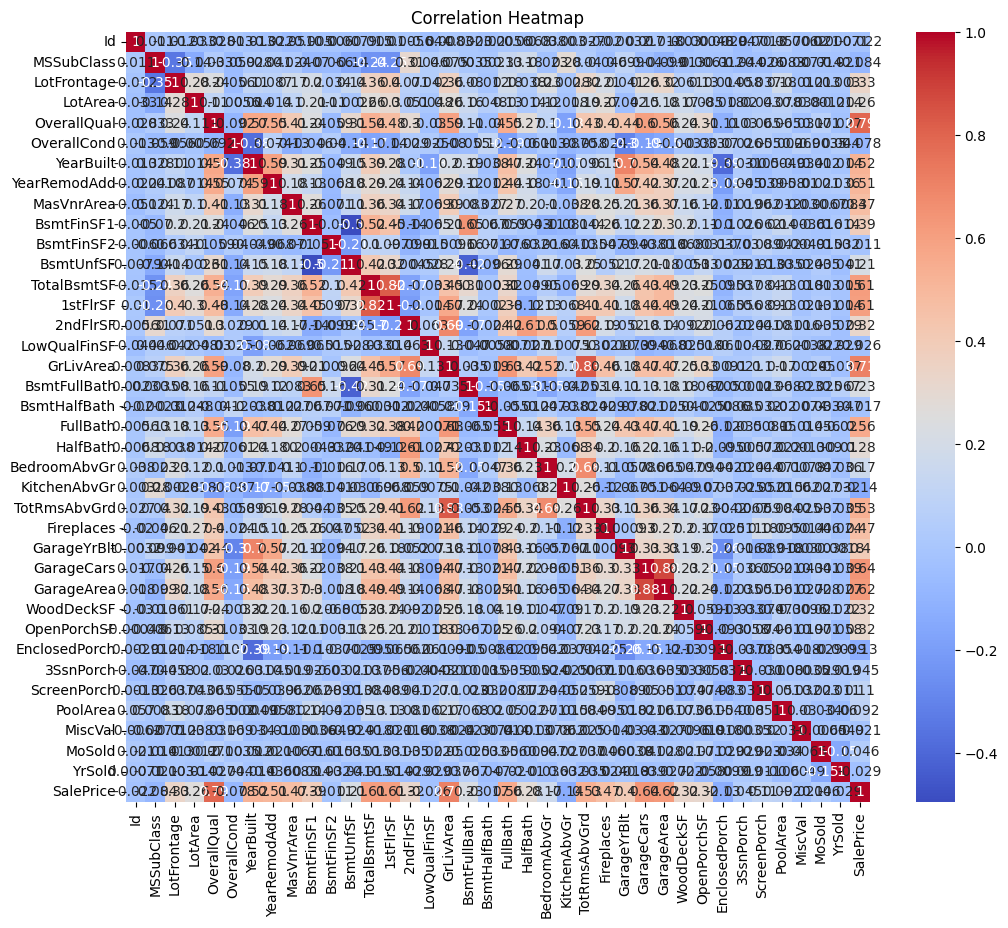

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


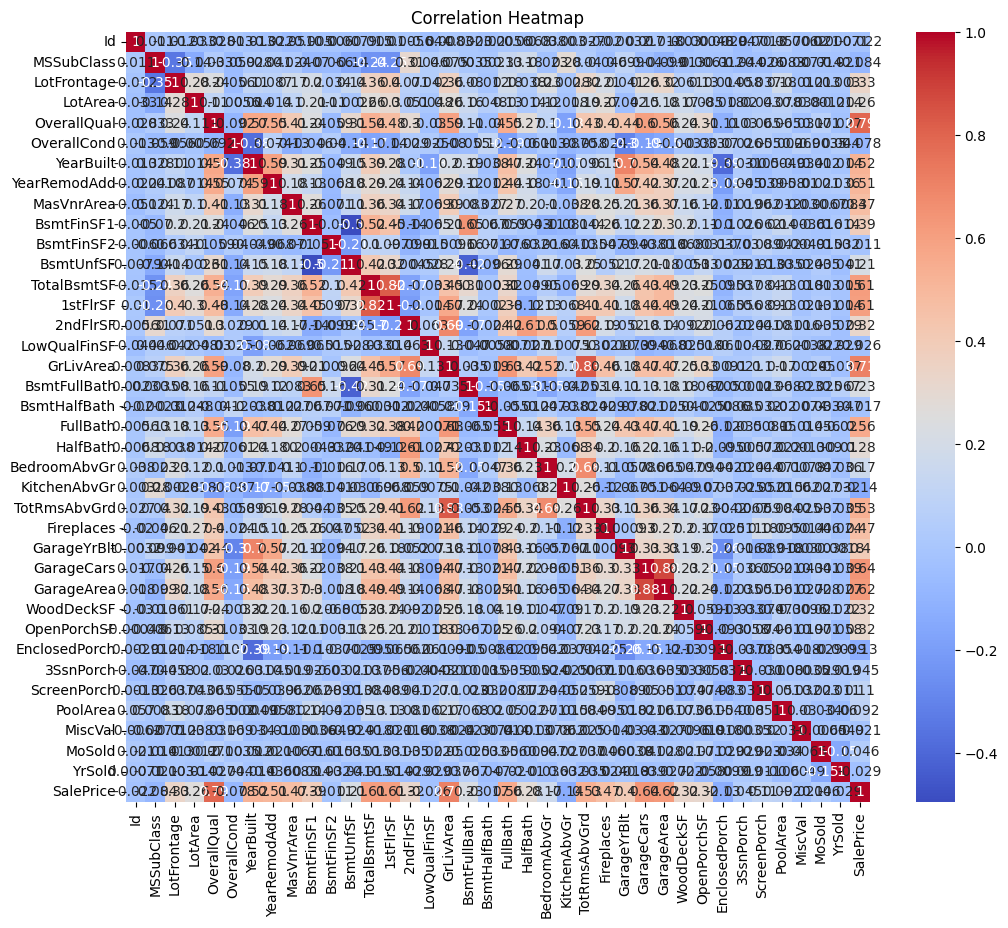

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

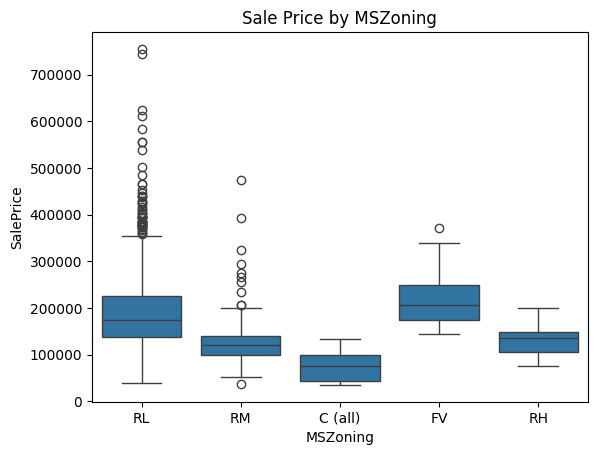

In [21]:
sns.boxplot(x='MSZoning', y='SalePrice', data=df_train)
plt.title('Sale Price by MSZoning')
plt.show()

# Lectura de test.csv

In [22]:
df_test = pd.read_csv("test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [23]:
# Calcula la moda de cada columna
moda_por_columna = df_test.mode().iloc[0]

# Rellena los valores NaN con la moda de cada columna
df_test = df_test.fillna(moda_por_columna)
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,...,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,700,7,2006,WD,Normal


In [24]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [26]:
df_test["SaleCondition"].value_counts()

Normal     1204
Partial     120
Abnorml      89
Family       26
Alloca       12
AdjLand       8
Name: SaleCondition, dtype: int64

In [27]:
# Utiliza el método factorize para asignar valores numéricos a cada categoría única
df_test['SaleConditionNumber'] = df_test['SaleCondition'].factorize()[0]
df_test['SaleConditionNumber'].value_counts()

0    1204
1     120
2      89
3      26
4      12
5       8
Name: SaleConditionNumber, dtype: int64

In [28]:
# Separar variables categóricas y numéricas
df_test_variables_numericas = df_test.select_dtypes(include=['int64', 'float64', 'uint8'])
df_test_variables_categoricas = df_test.select_dtypes(include=['object'])

# Visualizar las columnas seleccionadas
print("Variables numéricas:")
print(df_test_variables_numericas.columns)
print("\nVariables categóricas:")
print(df_test_variables_categoricas.columns)


Variables numéricas:
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleConditionNumber'],
      dtype='object')

Variables categóricas:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposur

# Categoria

# Separar la data

In [29]:
X1 = df_test_variables_numericas.drop('SaleConditionNumber', axis = 1)
y1 = df_test_variables_numericas["SaleConditionNumber"]

print(X1.shape, y1.shape)

(1459, 37) (1459,)


In [30]:
#Lo convertimos en un lista de numpy
X1 = np.array(X1)
y1 = np.array(y1)

# Entrenamiento y Prueba

In [31]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=123)

In [32]:
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(1167, 37) (292, 37) (1167,) (292,)


### Escalar la data

In [33]:
min_max_scaler1 = MinMaxScaler()
X_train1 = min_max_scaler1.fit_transform(X_train1)
X_test1 = min_max_scaler1.transform(X_test1)

# Construir, compilar y ajustar

### Construir el modelo

In [34]:
model1 = Sequential() #Para construir la red de manera simple.
model1.add(Dense(1000, input_shape=(X_train1.shape[1],), activation='relu')) #1000 neuronas, 
model1.add(Dense(500, activation='relu'))
model1.add(Dense(250, activation='relu'))
model1.add(Dense(1, activation='linear')) #Nodo de salida
model1.summary() # Ver la arquitectura del modelo

/home/arg/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-13 16:42:58.078576: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-13 16:42:58.079131: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │        38,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 664,001 (2.53 MB)

 Trainable params: 664,001 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

### Compilar modelo

In [35]:
model1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [36]:
es1 = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Ajustar modelo

In [37]:
history1 = model1.fit(X_train1, y_train1,
                    validation_data = (X_test1, y_test1),
                    callbacks=[es1],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

Epoch 1/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7284 - mae: 0.5230 - val_loss: 0.4939 - val_mae: 0.4383
Epoch 2/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6414 - mae: 0.5271 - val_loss: 0.5253 - val_mae: 0.5253
Epoch 3/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7011 - mae: 0.5611 - val_loss: 0.4910 - val_mae: 0.3960
Epoch 4/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6154 - mae: 0.5027 - val_loss: 0.5287 - val_mae: 0.2791
Epoch 5/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5907 - mae: 0.4639 - val_loss: 0.5111 - val_mae: 0.4710
Epoch 6/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6672 - mae: 0.5336 - val_loss: 0.4939 - val_mae: 0.3821
Epoch 7/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7094 - mae: 0.5310 - val_loss: 0.5060 - val_mae: 0.3319
Epoch 8/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6942 - mae: 0.4777 - val_loss: 0.6548 - val_mae: 0.6045
Epoch 9/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - l

# Graficar

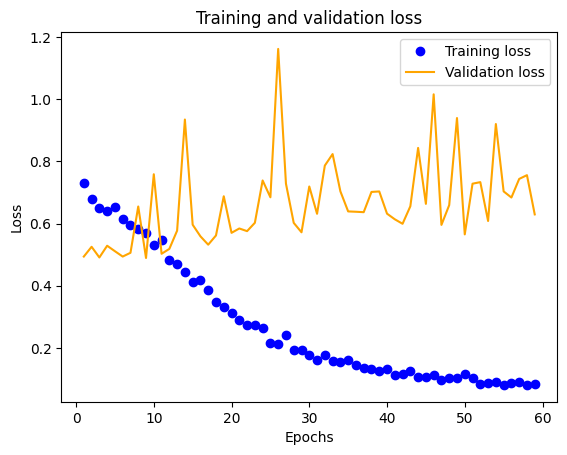

In [38]:
history_dict1 = history1.history
loss_values1 = history_dict1['loss'] 
val_loss_values1 = history_dict1['val_loss']
epochs1 = range(1, len(loss_values1) + 1) # Numero de Epochs, para X
plt.plot(epochs1, loss_values1, 'bo', label='Training loss')
plt.plot(epochs1, val_loss_values1, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


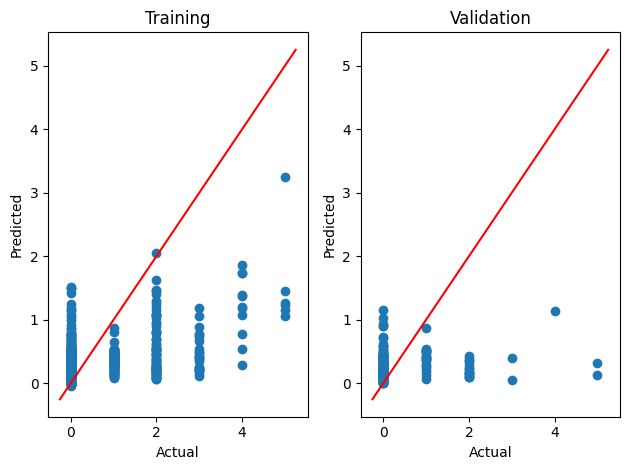

In [39]:
fig1, axes1 = plt.subplots(1,2) # 1 fila, dos columnas


# Entrenamiento
axes1[0].scatter(x=y_train1, y=model1.predict(X_train1)) #first row, first entry (left top)
axes1[0].set_xlabel("Actual", fontsize=10)
axes1[0].set_ylabel("Predicted",  fontsize=10)
axes1[0].set_title("Training")
# Linea de 45 grados
x1 = np.linspace(*axes1[0].get_xlim())
axes1[0].plot(x1, x1, color='red')
# Validacion
axes1[1].scatter(x=y_test1, y=model1.predict(X_test1)) # first row, second entry (right top)
axes1[1].set_xlabel("Actual", fontsize=10)
axes1[1].set_ylabel("Predicted",  fontsize=10)
axes1[1].set_title("Validation")
# Linea de 45 grados
x1 = np.linspace(*axes1[1].get_xlim())
axes1[1].plot(x1, x1, color='red')
# Pequeña separación entre gráficas.
fig1.tight_layout()

# Predecir

In [40]:
pred1 = model1.predict(X_test1)
pred1

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 1.23216860e-01],
       [ 1.62324280e-01],
       [ 1.32858545e-01],
       [ 4.12313104e-01],
       [ 3.13390702e-01],
       [ 4.84412462e-02],
       [ 5.07108867e-02],
       [ 2.67619956e-02],
       [ 6.24571562e-01],
       [ 1.90956563e-01],
       [ 2.09058940e-01],
       [ 2.31145948e-01],
       [ 1.28673792e-01],
       [ 1.50994509e-01],
       [ 3.89290005e-01],
       [ 1.99803740e-01],
       [ 4.08161372e-01],
       [ 1.87353510e-02],
       [ 3.52431029e-01],
       [ 5.70450723e-02],
       [ 1.37550175e-01],
       [ 8.95435095e-01],
       [ 5.41500896e-02],
       [ 1.11768164e-01],
       [ 1.44283384e-01],
       [ 8.40461552e-02],
       [ 9.04417410e-02],
       [ 3.50072056e-01],
       [ 1.81003988e-01],
       [ 1.01584762e-01],
       [ 2.76843190e-01],
       [ 4.06593591e-01],
       [ 5.83545983e-01],
       [ 1.56968504e-01],
       [ 5.15741646e-01],
       [ 1.16563834e-01],
       [ 4.24537212e-01],
       [ 7.30941743e-02],
       [ 2.0

# Metricas

In [41]:
trainpreds1 = model1.predict(X_train1)

print("MAE Entrenamiento: ",mean_absolute_error(y_train1, trainpreds1)) # Entrenamiento
print("MAE Prueba: ",mean_absolute_error(y_test1, pred1)) # Prueba

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MAE Entrenamiento:  0.4010629931268471
MAE Prueba:  0.37091720092416525


In [42]:
mse1 = mean_squared_error(y_test1, pred1)
print("MSE: ",mse1)

MSE:  0.4892925402491298


In [43]:
r2_1 = r2_score(y_test1, pred1)
print("R²: ", r2_1)


R²:  0.02951895524793413


# Analisis
asdf
asdf
asdf
asd
fa
df
asdf

# Matriz de confusion

In [44]:
# Calcular la matriz de confusión
conf_matrix1 = confusion_matrix(y_train1, pred1)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix1)

ValueError: Found input variables with inconsistent numbers of samples: [1167, 292]

In [ ]:
# Calcular la matriz de confusión
conf_matrix11 = confusion_matrix(y_train1, pred1)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix11)

# Separacion de la data

In [44]:
X = df_train_variables_numericas.drop('SalePrice', axis = 1)
y = df_train_variables_numericas['SalePrice']

print(X.shape, y.shape)

(1460, 37) (1460,)


In [45]:
#Lo convertimos en un lista de numpy
X = np.array(X)
y = np.array(y)

# Dividir en entrenamiento y prueba

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [47]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1168, 37) (292, 37) (1168,) (292,)


# Escalar la data

In [48]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# Construccion modelo

In [49]:
model = Sequential() #Para construir la red de manera simple.
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) #1000 neuronas, 
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) #Nodo de salida
model.summary() # Ver la arquitectura del modelo

/home/arg/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1000)           │        38,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 664,001 (2.53 MB)

 Trainable params: 664,001 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

# Compilar el modelo

In [50]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [51]:
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# Ajustar el modelo

In [52]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

Epoch 1/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 37881561088.0000 - mae: 178506.2500 - val_loss: 37774180352.0000 - val_mae: 178009.1719
Epoch 2/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38113845248.0000 - mae: 177835.2188 - val_loss: 31137425408.0000 - val_mae: 159653.6094
Epoch 3/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29355268096.0000 - mae: 151226.7344 - val_loss: 18512142336.0000 - val_mae: 117420.3828
Epoch 4/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16412468224.0000 - mae: 103534.8125 - val_loss: 6096789504.0000 - val_mae: 53301.4531
Epoch 5/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5322723840.0000 - mae: 45761.8125 - val_loss: 2827837440.0000 - val_mae: 34666.9727
Epoch 6/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2994596096.0000 - mae: 37829.7500 - val_loss: 2814235904.0000 - val_mae: 32354.7871
Epoch 7/5000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2704468736.0000 - mae: 35329.2695 - val_loss: 2576706304.0000

# Graficar

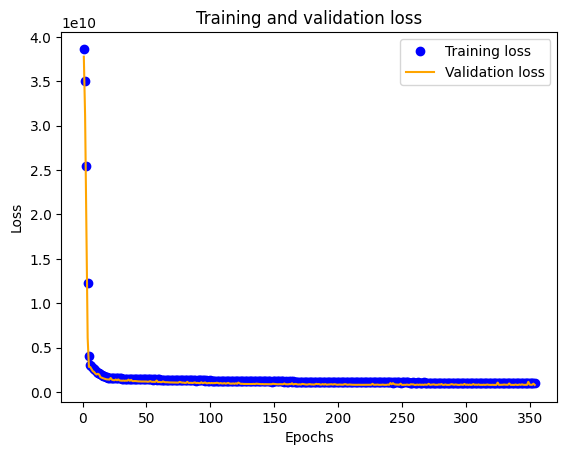

In [53]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1) # Numero de Epochs, para X
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


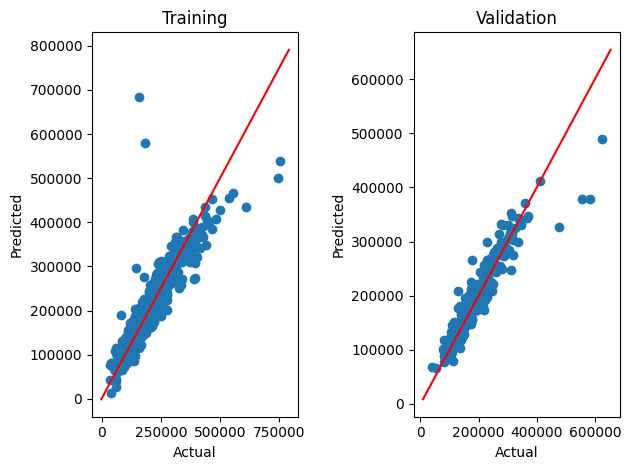

In [54]:
fig, axes = plt.subplots(1,2) # 1 fila, dos columnas


# Entrenamiento
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# Linea de 45 grados
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validacion
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# Linea de 45 grados
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')
# Pequeña separación entre gráficas.
fig.tight_layout()

# Predecir

In [55]:

pred = model.predict(X_test)
pred

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[233583.9  ],
       [103983.77 ],
       [176963.38 ],
       [254413.75 ],
       [143860.77 ],
       [256545.47 ],
       [314972.06 ],
       [146758.47 ],
       [153933.77 ],
       [127715.24 ],
       [155270.94 ],
       [256746.22 ],
       [148523.1  ],
       [111884.53 ],
       [243237.36 ],
       [190106.47 ],
       [150645.   ],
       [324957.2  ],
       [220964.81 ],
       [172118.94 ],
       [172861.31 ],
       [195617.5  ],
       [111112.59 ],
       [178840.36 ],
       [208663.47 ],
       [137442.08 ],
       [211400.75 ],
       [183276.56 ],
       [118682.44 ],
       [146132.19 ],
       [129398.32 ],
       [190058.84 ],
       [128254.3  ],
       [205821.97 ],
       [343915.25 ],
       [198600.84 ],
       [173631.36 ],
       [326138.94 ],
       [187946.94 ],
       [102227.43 ],
       [141174.44 ],
       [224352.94 ],
       [179562.98 ],
       [167174.66 ],
       [233575.94 ],
       [102516.97 ],
       [308113.06 ],
       [22139

# Metricas

In [56]:

trainpreds = model.predict(X_train)

print("MAE Entrenamiento: ",mean_absolute_error(y_train, trainpreds)) # Entrenamiento
print("MAE Prueba: ",mean_absolute_error(y_test, pred)) # Prueba

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAE Entrenamiento:  17316.88694700476
MAE Prueba:  17050.329436001713


In [57]:
mse = mean_squared_error(y_test, pred)
print("MSE: ",mse)

MSE:  792346125.5202973


In [58]:
r2 = r2_score(y_test, pred)
print("R²: ", r2)


R²:  0.8717806647457316


# Analisis
### sdf
### adf
### a
sdf
asdf
aasdf
df

# Matriz de confusion

In [61]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_test)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

ValueError: Found input variables with inconsistent numbers of samples: [1168, 292]